In [1]:
!pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.2 MB/s eta 0:00:00


# Scraping Data from Goole Play Review

In [2]:
"""
from google_play_scraper import Sort, reviews

deepseek_review = 'com.deepseek.chat'

def get_review(app_id, lang = 'id', count = 20000, sort = Sort.NEWEST, filter_score_with = None, filter_device_with = None, continuation_token = None):
  try:
    result, continuation_token = reviews(
        deepseek_review,
        lang = lang,
        count = count,
        sort = sort,
        filter_score_with = filter_score_with,
        filter_device_with = filter_device_with,
        continuation_token=continuation_token
    )
    return result, continuation_token
  except Exception as e:
    print(e)
    return None, None

reviews, continuation_token = get_review(deepseek_review)

if reviews is not None:
  print(f"Number of reviews: {len(reviews)}")
  if len(reviews) > 0:
    print('The first reviews: ', reviews[0])
else:
  print("No reviews found.")
  """


'\nfrom google_play_scraper import Sort, reviews\n\ndeepseek_review = \'com.deepseek.chat\'\n\ndef get_review(app_id, lang = \'id\', count = 20000, sort = Sort.NEWEST, filter_score_with = None, filter_device_with = None, continuation_token = None):\n  try:\n    result, continuation_token = reviews(\n        deepseek_review,\n        lang = lang,\n        count = count,\n        sort = sort,\n        filter_score_with = filter_score_with,\n        filter_device_with = filter_device_with,\n        continuation_token=continuation_token\n    )\n    return result, continuation_token\n  except Exception as e:\n    print(e)\n    return None, None\n\nreviews, continuation_token = get_review(deepseek_review)\n\nif reviews is not None:\n  print(f"Number of reviews: {len(reviews)}")\n  if len(reviews) > 0:\n    print(\'The first reviews: \', reviews[0])\nelse:\n  print("No reviews found.")\n  '

In [3]:
"""
import csv


def export_to_csv(reviews, filename = 'Deepseek review data.csv'):
  if reviews:
    filenames = ['review_id', 'username', 'rating', 'review text', 'date']

    with open(filename, 'w', newline = '', encoding = 'utf-8') as file:
      writer = csv.DictWriter(file, fieldnames = filenames)
      writer.writeheader()

      for review in reviews:
        writer.writerow({
            'review_id':review['reviewId'],
            'username':review['userName'],
            'rating':review['score'],
            'review text':review['content'],
            'date':review['at'].strftime('%Y-%m-%d')
        })

      print(f'export process is finished and filename is: {filename}')
  else:
    print('No reviews found')


export_to_csv(reviews, location)
"""

"\nimport csv\n\n\ndef export_to_csv(reviews, filename = 'Deepseek review data.csv'):\n  if reviews:\n    filenames = ['review_id', 'username', 'rating', 'review text', 'date']\n\n    with open(filename, 'w', newline = '', encoding = 'utf-8') as file:\n      writer = csv.DictWriter(file, fieldnames = filenames)\n      writer.writeheader()\n\n      for review in reviews:\n        writer.writerow({\n            'review_id':review['reviewId'],\n            'username':review['userName'],\n            'rating':review['score'],\n            'review text':review['content'],\n            'date':review['at'].strftime('%Y-%m-%d')\n        })\n\n      print(f'export process is finished and filename is: {filename}')\n  else:\n    print('No reviews found')\n\n\nexport_to_csv(reviews, location)\n"

In [4]:
import pandas as pd
from google.colab import files, drive
drive.mount('/content/drive')
location = "/content/drive/MyDrive/Machine learning folder/ai sentiment analysis/Deepseek review data.csv"

df = pd.read_csv(location)
df.head()

Mounted at /content/drive


,review_id,username,rating,review text,date
0,2be87889-0c61-43ed-ae7a-09c29f716fdc,Pengguna Google,3,why deepseek is error?,2025-12-29
1,a387c7a5-a84e-484f-b09e-94f374cf17e5,Pengguna Google,1,Tolong ini kenapa tidak bisa login apalagi seb...,2025-12-28
2,604a73c4-4c96-4377-88f7-3e13d328239f,Pengguna Google,1,"深度求索 ,现在的限制 过于严格。即使是完全无害、纯属虚构、仅供个人使用的故事创作请求，也会...",2025-12-28
3,271723aa-708d-4c28-b3ae-e7dadf6c8a78,Pengguna Google,5,Deepseek hebat,2025-12-28
4,79c37f30-112c-4992-b923-c0426391746d,Pengguna Google,4,tolong agar alnya tidak mudah lupa.saya sudah ...,2025-12-27


# Create Sentiment Category Column

In [5]:
def filter_ratings(rating):
  if rating > 3:
    return 'positive'
  elif rating < 3:
    return 'negative'
  else:
    return 'neutral'

df['sentiment'] = df['rating'].apply(filter_ratings)
df.sample(5)

,review_id,username,rating,review text,date,sentiment
3947,c28aa217-096f-4bff-a2bb-0f952b0b5e3b,Pengguna Google,5,Saya mencoba AI ini dari referensi reels nya C...,2025-01-27,positive
3130,782ba695-9c9d-4b20-8660-9b050cb85288,Pengguna Google,1,"Mau daftar selalu gagal kode OTP, padahal wakt...",2025-01-31,negative
1546,96f0d0d1-0481-45fd-bd52-90d03bd0084a,Pengguna Google,1,banyak jawaban yg tidak akurat,2025-04-19,negative
3046,bdd05b55-86d8-4cd6-a362-45c07d4d1376,Pengguna Google,5,Lebih cepat lebih canggih dari gemini,2025-02-01,positive
1526,8ef57ee8-ab70-4d59-a83d-73eb99c1c95e,Pengguna Google,1,Server sering down,2025-04-21,negative


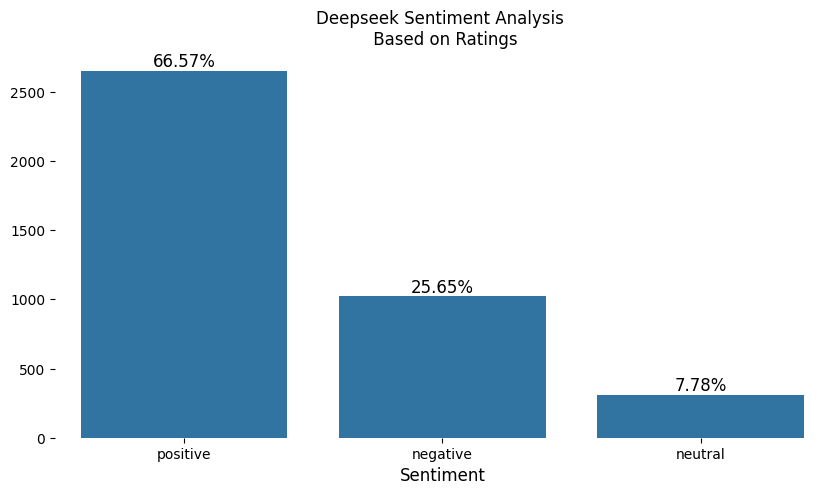

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sentiment_counts = df['sentiment'].value_counts()

fig, ax = plt.subplots(figsize = (10,5))
ax = sns.barplot(x = sentiment_counts.index, y = sentiment_counts.values)
plt.title('Deepseek Sentiment Analysis \n Based on Ratings')
ax.set_xlabel('Sentiment', fontsize = 12)

total = len(df.sentiment)

for i, count in enumerate(sentiment_counts.values):
  percentage = f'{100 * count/total:.2f}'
  ax.text(i, count +0.10, f'{percentage}%', ha = 'center', va = 'bottom', fontsize = 12)

for spine in ax.spines.values():
  spine.set_visible(False)

#plt.savefig('deepseek_sentiment_ratings.png', dpi = 200)
#files.download('deepseek_sentiment_ratings.png')
plt.show()

# Preprocessing

## Cleaning Text

In [7]:
import re

def cleaning(text):
  if pd.isna(text):
    return ""

  text = str(text)

  # lower the words
  text = text.lower()

  # remove punctuation
  text = re.sub(r'[^\w\s]', ' ', text)

  # remove numbers
  text = re.sub(r'\d+', ' ', text)

  # clean extra space
  text = re.sub(r'\s+', ' ', text).strip()

  # reduce repeated characters
  text= re.sub(r'(\w)\1{2,}', r'\1', text)

  return text

df['clean_rev'] = df['review text'].apply(cleaning)
df[['review text', 'clean_rev']].sample(5)

,review text,clean_rev
3739,"lag, busy whatever",lag busy whatever
528,"aplikasi ai jelek banget anjir, harus ulang be...",aplikasi ai jelek banget anjir harus ulang ber...
3706,Wow wow wow,wow wow wow
2686,"Lama upload file padahal jaringan bagus, dalam...",lama upload file padahal jaringan bagus dalam ...
1239,Loading Low,loading low


In [8]:
print(f"\nAverage raw text length: {df['review text'].str.len().mean():.1f} chars")
print(f"\nAverage clean text length: {df['clean_rev'].str.len().mean():.1f} chars")


Average raw text length: 80.5 chars

Average clean text length: 77.9 chars


## Delete Stopwords

### Step1: Indonesia

In [9]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt', quiet = True)
nltk.download('punkt_tab', quiet = True)
stopword_id = set(stopwords.words('indonesian'))

# create custom stopwods
id_stopwords = {'dan', 'yang', 'atau', 'apk', 'aplikasinya', 'aplikasi', 'nya', 'juga',
                'atau', 'ai', 'foto', 'analisa', 'gambar', 'deepseek', 'banget', 'bgt', 'ya', 'yg',' fitur'}

# discarded some stopwordss
discarded_stopword = {'luar', 'biasa', 'baik', 'lama'}

stopword_id.update(id_stopwords)
stopword_id.discard(discarded_stopword)

def remove_stopwords_id(text):
  tokens = word_tokenize(text)
  filtered_token_id = [word for word in tokens if word.lower() not in stopword_id]
  filtered_text = " ".join(filtered_token_id)
  return filtered_text

df['text_no_stopwords_id'] = df['clean_rev'].apply(remove_stopwords_id)
print(f"The length after stopword removal process: {df['text_no_stopwords_id'].str.len().mean():.1f} chars")
print(f" Diff: {df['review text'].str.len().mean() - df['text_no_stopwords_id'].str.len().mean():.1f} chars")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


The length after stopword removal process: 45.5 chars
 Diff: 35.0 chars


In [10]:
for word in id_stopwords:
  if word in stopword_id:
    print(f"'{word}' is in stopword set")
  else:
    print(f"'{word}' is not in stopword set")

'apk' is in stopword set
'foto' is in stopword set
'dan' is in stopword set
'deepseek' is in stopword set
' fitur' is in stopword set
'aplikasinya' is in stopword set
'gambar' is in stopword set
'aplikasi' is in stopword set
'ya' is in stopword set
'yang' is in stopword set
'nya' is in stopword set
'bgt' is in stopword set
'yg' is in stopword set
'banget' is in stopword set
'juga' is in stopword set
'ai' is in stopword set
'atau' is in stopword set
'analisa' is in stopword set


### Step2: English

In [11]:
stopword_en = set(stopwords.words('english'))

en_stopwords = {'analysis', 'picture', 'figure', 'deepseek', 'ai', 'AI', 'photo', 'the', 'app'}

stopword_en.update(en_stopwords)

def remove_stopword_en(text):
  tokens = word_tokenize(text)
  filtered_token_en = [word for word in tokens if word.lower() not in stopword_en]
  filtered_text = " ".join(filtered_token_en)
  return filtered_text

df['text_no_stopwords_en'] = df['text_no_stopwords_id'].apply(remove_stopword_en)
print(f"The length after english stopword removal: {df['text_no_stopwords_en'].str.len().mean():.1f} chars")
print(f"Diff: {df['text_no_stopwords_en'].str.len().mean() - df['text_no_stopwords_id'].str.len().mean():.1f} chars")

The length after english stopword removal: 43.0 chars
Diff: -2.5 chars


In [12]:
for word in en_stopwords:
  if word in stopword_en:
    print(f"'{word}' is in stopword set")
  else:
    print(f"'{word}' is not in stopword set")

'picture' is in stopword set
'photo' is in stopword set
'app' is in stopword set
'the' is in stopword set
'deepseek' is in stopword set
'AI' is in stopword set
'analysis' is in stopword set
'ai' is in stopword set
'figure' is in stopword set


## Tokenization

In [13]:
def tokenize_text(text):
  if pd.isna(text) or text == "":
    return []

  tokens = word_tokenize(text.lower())
  token = [token for token in tokens if len(tokens)>= 1]
  return token

df['token_text'] = df['text_no_stopwords_en'].apply(tokenize_text)

for i in range(3):
  print(f"Review {i + 1}")
  print(df['token_text'].iloc[i])

df['length_token'] = df['token_text'].apply(len)
print(f"\nAverage Tokens per Review: {df['length_token'].mean():.1f}")

Review 1
['error']
Review 2
['tolong', 'login', 'coba', 'tulis', 'prompt', 'gak']
Review 3
['深度求索', '现在的限制', '过于严格', '即使是完全无害', '纯属虚构', '仅供个人使用的故事创作请求', '也会被反复拒绝', '并只返回', '抱歉', '这超出了我目前的能力范围', '我们换个话题吧', '这种机械化的拒绝严重扼杀了用户的创造力', '也大大降低了使用体验', '一个', '应该能够区分危险内容与安全的虚构创作', '缺乏合理解释的自动拒答让人感觉系统僵硬且不友好', '如果这种情况持续下去', '深度求索', '将逐渐失去其作为创意工具的核心价值']

Average Tokens per Review: 6.3


In [14]:
df.sample(3)

,review_id,username,rating,review text,date,sentiment,clean_rev,text_no_stopwords_id,text_no_stopwords_en,token_text,length_token
2616,f1246aa1-3d58-4299-8937-751c8372ab53,Pengguna Google,3,kadang gak merespon 😤..loading lama saat meres...,2025-02-05,neutral,kadang gak merespon loading lama saat merespon...,kadang gak merespon loading merespon cepat cha...,kadang gak merespon loading merespon cepat cha...,"[kadang, gak, merespon, loading, merespon, cep...",8
366,44acd775-93f5-4501-aec1-19ba49828791,Pengguna Google,4,tolong tingkatkan batas limit chat di kolom ob...,2025-09-29,positive,tolong tingkatkan batas limit chat di kolom ob...,tolong tingkatkan batas limit chat kolom obrol...,tolong tingkatkan batas limit chat kolom obrol...,"[tolong, tingkatkan, batas, limit, chat, kolom...",8
3022,2244f8af-2f77-4f0c-959d-950f8bbf8942,Pengguna Google,3,Server sibuk.. Apa apa an ini,2025-02-01,neutral,server sibuk apa apa an ini,server sibuk an,server sibuk,"[server, sibuk]",2


# Statistical Analysis

## Post Cleaning

In [15]:
# average word length before and after
raw_review = df['review text'].str.len().mean()
clean_review = df['text_no_stopwords_en'].str.len().mean()
print(f"Raw review text in average length: {raw_review:.2f} chars")
print(f"Cleaned review text in average length: {clean_review:.2f} chars")
print(f"Reduction: {((raw_review - clean_review)*100/df['review text'].str.len().mean()):.2f} %")

Raw review text in average length: 80.50 chars
Cleaned review text in average length: 42.99 chars
Reduction: 46.60 %


In [16]:
df['raw_word_count'] = df['review text'].str.split().str.len()
print(f"raw avg word: {df['raw_word_count'].mean():.1f}")
print(f"clean avg word: {df['length_token'].mean():.1f}")

raw avg word: 12.7
clean avg word: 6.3


In [17]:
# number of emtpy words
empty_words = df[df['token_text'].apply(lambda x: len(x) == 0)]
print(f"Number of empty words: {len(empty_words)}")

if len(empty_words) > 0:
  print("Example of empty posts after cleaning: ")
  print(empty_words['review text'].head().tolist())

Number of empty words: 68
Example of empty posts after cleaning: 
['baik', '👍', '👎', 'Aplikasi 👍', '👍']


## Most Frequent Words

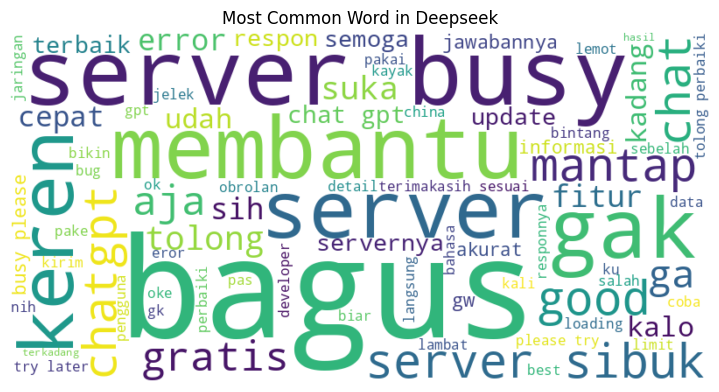

In [18]:
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_words = [word for tokens in df['token_text'] for word in tokens]
freqdist = FreqDist(all_words)

text = ' '.join(all_words)
wordcloud = WordCloud(width = 800, height = 400, background_color='white', min_font_size=12).generate(text)

plt.figure(figsize = (7,7), facecolor = None)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Most Common Word in Deepseek')
plt.tight_layout(pad = 0)
#plt.savefig('deepseek_most_freq_words.png', dpi = 200)
#files.download('deepseek_most_freq_words.png')
plt.show()

## Most Non-Positive Frequent Word

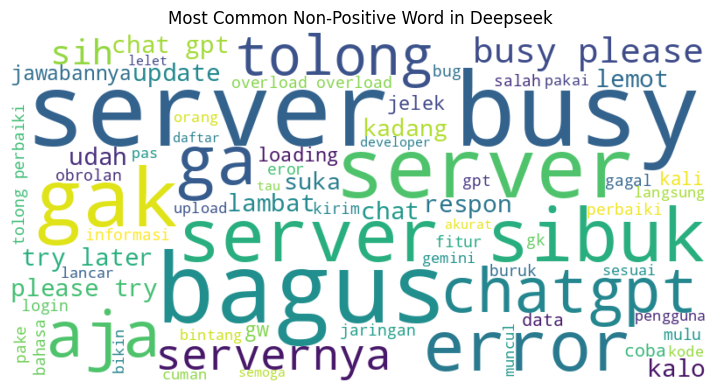

In [19]:
nonpos_rev = df[df['sentiment'] != 'positive']
nonpos_words = [word for tokens in nonpos_rev['token_text'] for word in tokens]
nonpos_freqdist = FreqDist(nonpos_words)

text = ' '.join(nonpos_words)
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white', min_font_size = 12).generate(text)

plt.figure(figsize = (7,7), facecolor = None)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis ('off')
plt.tight_layout(pad = 0)
plt.title('Most Common Non-Positive Word in Deepseek')
#plt.savefig('deepseek_nonpos_words.png', dpi = 200)
#files.download('deepseek_nonpos_words.png')
plt.show()

## Word Count Distribution

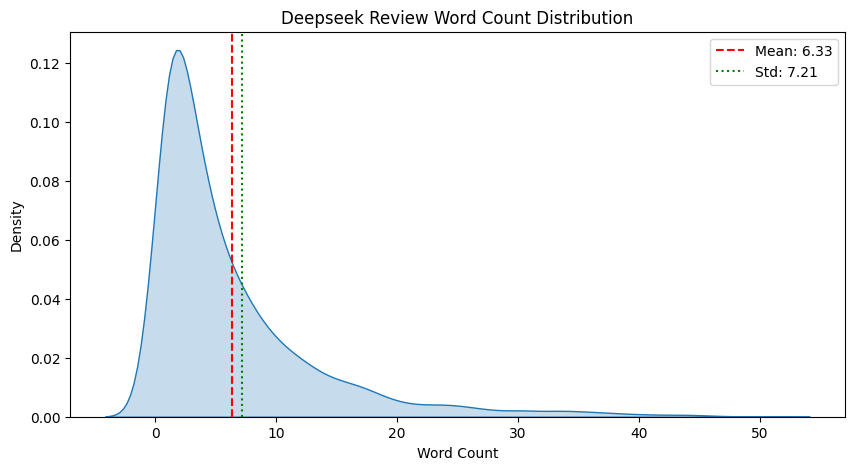

In [20]:
plt.figure(figsize = (10, 5))
sns.kdeplot(data = df, x = df['length_token'], fill = True)
plt.ylabel('Density')
plt.xlabel('Word Count')
plt.title('Deepseek Review Word Count Distribution')

# Calculate mean and standard deviation
mean_val = df['length_token'].mean()
std_val = df['length_token'].std()

# Add text annotations for mean and std
plt.axvline(mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axvline(std_val, color='g', linestyle=':', label=f'Std: {std_val:.2f}')
plt.legend()

#plt.savefig('deepseek_review_wordcount_dist.png', dpi = 300)
#files.download('deepseek_review_wordcount_dist.png')
plt.show()

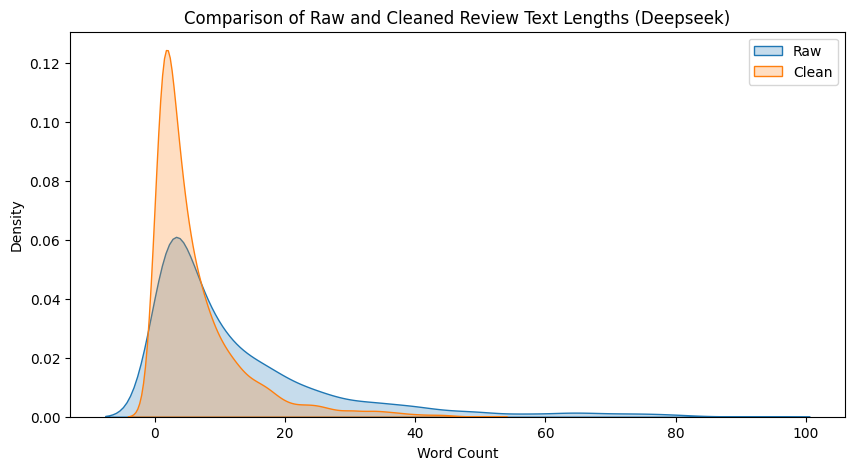

In [21]:
length_review_df = pd.DataFrame({'length_cleaned_reviews':df.length_token, 'length_raw_review':df['review text'].str.split().str.len()})
raw = length_review_df['length_raw_review']
clean = length_review_df['length_cleaned_reviews']

plt.figure(figsize = (10,5))
sns.kdeplot(data = length_review_df, x = raw, fill = True, label = 'Raw')
sns.kdeplot(data = length_review_df, x = clean, fill = True, label = 'Clean')
plt.xlabel('Word Count')
plt.ylabel('Density')
plt.title('Comparison of Raw and Cleaned Review Text Lengths (Deepseek)')
plt.legend()

# save the figure
#plt.savefig("raw_cleaned_comparison_dist_deepseek.png", dpi = 300)
#files.download("raw_cleaned_comparison_dist_deepseek.png")

plt.show()

## Long Text Review

In [22]:
# long text review
long_rev = df[df['length_token'] >= 20]
long_rev[['token_text', 'length_token', 'sentiment']].sample(5)

,token_text,length_token,sentiment
225,"[hi, mate, u, still, insomania, keren, fitur, ...",21,positive
3030,"[agama, china, ko, ga, ditarik, muncul, tulisa...",20,negative
3874,"[disayangkan, login, google, akun, mendaftar, ...",35,neutral
1457,"[keren, jawabannya, kadang, bijak, kadang, nyi...",22,positive
528,"[jelek, anjir, ulang, berkali, kali, sampe, ta...",42,negative


## Time-based Sentiment Analysis

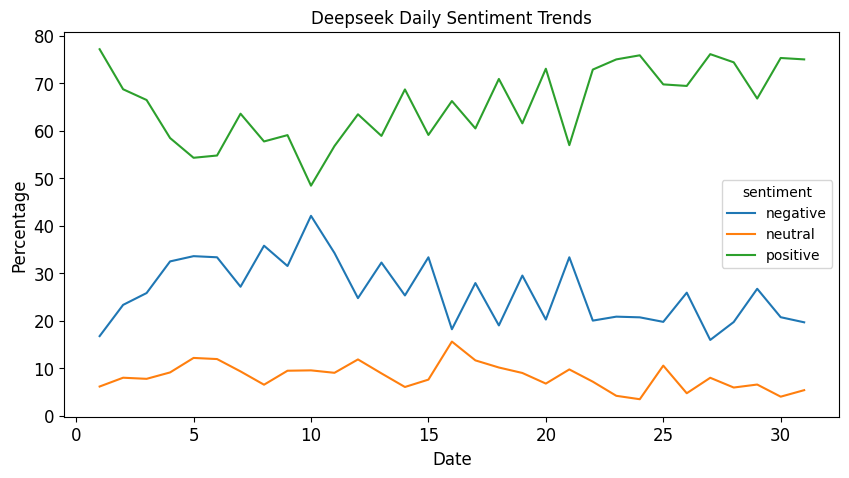

In [23]:
# change date from object to datetime
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# create daily sentiment analysis
df['day']= df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

daily_sentiment = df.groupby(['day', 'sentiment']).size().unstack(fill_value=0)
percent_dailysentiment = daily_sentiment.div(daily_sentiment.sum(axis = 1), axis = 0)*100

fig, ax = plt.subplots(figsize = (10,5))
percent_dailysentiment.plot(kind = 'line', y = ['negative', 'neutral', 'positive'], title = 'Deepseek Daily Sentiment Trends', fontsize = 12, ax=ax)
ax.set_xlabel('Date', fontsize = 12)
ax.set_ylabel('Percentage', fontsize = 12)
#plt.savefig('deepseek_daily_sentiment_trends.png', dpi = 200)
#files.download('deepseek_daily_sentiment_trends.png')
plt.show()

In [24]:
percent_dailysentiment

sentiment,negative,neutral,positive
day,,,
1,16.734694,6.122449,77.142857
2,23.312883,7.975460,68.711656
3,25.806452,7.741935,66.451613
4,32.467532,9.090909,58.441558
5,33.571429,12.142857,54.285714
6,33.333333,11.904762,54.761905
7,27.131783,9.302326,63.565891
8,35.772358,6.504065,57.723577
9,31.496063,9.448819,59.055118


# Sentiment Analysis Method

## Lexicon based Method

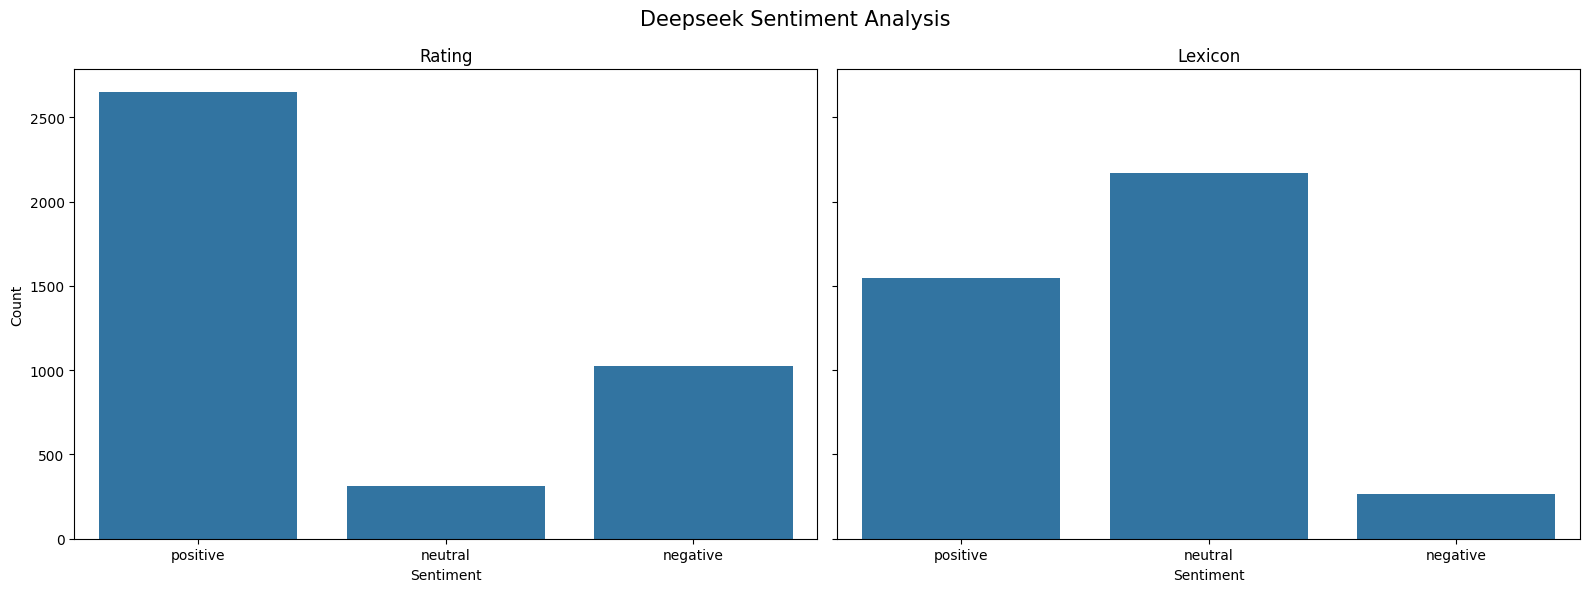

In [25]:
sentiment_lexicon_id = {'bagus': 1, 'baik': 1, 'keren': 1, 'mantap': 1, 'membantu': 1, 'canggih':1, 'terbaik':1,
    'jelek': -1, 'buruk': -1, 'lama': -1, 'error': -1, 'susah': -1, 'eror':-1, 'bug':-1, 'gabisa':-1, 'aneh':-1, 'berbayar':-1, 'bayar':-1, 'memburuk':-1, 'menurun':-1,
    'biasa': 0, 'netral': 0}

sentiment_lexicon_en = {'good': 1, 'bad':-1, 'best':1, 'worst':-1, 'better':1}

combined_lexicon = {**sentiment_lexicon_id, **sentiment_lexicon_en}

def lexicon_based(text):
  if pd.isna(text) or text.strip() == '':
    return 0

  tokens = text.split()
  score = 0
  for token in tokens:
    if token.lower() in combined_lexicon:
      score += combined_lexicon[token.lower()] # Added .lower() for case-insensitivity
  return score # Moved return outside the loop

df.rename(columns = {'text_no_stopwords_en':'final_rev'}, inplace = True)
df['lexicon_score'] = df['final_rev'].apply(lexicon_based)

def cat_lexicon_score(score):
  if score > 0:
    return 'positive'
  elif score < 0:
    return 'negative'
  else:
    return 'neutral'

df['lexicon_sentiment'] = df['lexicon_score'].apply(cat_lexicon_score)

import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 6),sharey = True)

sentiment_order = ['positive', 'neutral', 'negative']

sns.countplot(data = df, x = 'sentiment', order = sentiment_order, ax = axes[0])
axes[0].set_title('Rating')
axes[0].set_xlabel('Sentiment')
axes[0].set_ylabel('Count')

sns.countplot(data = df, x = 'lexicon_sentiment', order = sentiment_order, ax = axes[1])
axes[1].set_title('Lexicon')
axes[1].set_xlabel('Sentiment')
axes[1].set_ylabel('Count')

plt.suptitle('Deepseek Sentiment Analysis', fontsize = 15)
plt.tight_layout()
#plt.savefig('deepseek_lexicon_result.png', dpi = 200)
#files.download('deepseek_lexicon_result.png')
plt.show()

In [27]:
# lexicon accuracy metrics
from sklearn.metrics import accuracy_score
lexicon_accuracy = accuracy_score(df['sentiment'], df['lexicon_sentiment'])
print(f"Lexicon Accuracy: {lexicon_accuracy:.2f}")

Lexicon Accuracy: 0.44


## LSTM

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

texts = df['final_rev'].astype(str).values
labels = df['sentiment'].map({'positive': 1, 'neutral': 0, 'negative': 0}).values

# tokenize and pad
vocab_size = 100
max_length = 50
tokenizer = Tokenizer(num_words = vocab_size, oov_token = '<OOV>')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_seq = pad_sequences(sequences, maxlen = max_length)

padded_seq

array([[ 0,  0,  0, ...,  0,  0, 27],
       [ 0,  0,  0, ...,  1,  1,  9],
       [ 0,  0,  0, ...,  1,  1,  1],
       ...,
       [ 0,  0,  0, ...,  0,  1,  1],
       [ 0,  0,  0, ..., 60, 33, 37],
       [ 0,  0,  0, ...,  1,  1,  1]], dtype=int32)

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(padded_seq, labels, test_size = 0.2, random_state = 42)

for i in range(5):
  print(f"Review {i+1}")
  print(f"Raw Review: {texts[i]}")
  print(f"Tokenize Sequence (first 10 tokens): {sequences[i][:10]}")
  print(f"Padded Sequence (first 10 values): {padded_seq[i][:10]}")
  sentiment = 'positive' if labels[i] == 1 else 'negative'
  print(f"Label (Encoded): {labels[i]} ({sentiment})")
  print("-"*100)

Review 1
Raw Review: error
Tokenize Sequence (first 10 tokens): [27]
Padded Sequence (first 10 values): [0 0 0 0 0 0 0 0 0 0]
Label (Encoded): 0 (negative)
----------------------------------------------------------------------------------------------------
Review 2
Raw Review: tolong login coba tulis prompt gak
Tokenize Sequence (first 10 tokens): [5, 1, 46, 1, 1, 9]
Padded Sequence (first 10 values): [0 0 0 0 0 0 0 0 0 0]
Label (Encoded): 0 (negative)
----------------------------------------------------------------------------------------------------
Review 3
Raw Review: 深度求索 现在的限制 过于严格 即使是完全无害 纯属虚构 仅供个人使用的故事创作请求 也会被反复拒绝 并只返回 抱歉 这超出了我目前的能力范围 我们换个话题吧 这种机械化的拒绝严重扼杀了用户的创造力 也大大降低了使用体验 一个 应该能够区分危险内容与安全的虚构创作 缺乏合理解释的自动拒答让人感觉系统僵硬且不友好 如果这种情况持续下去 深度求索 将逐渐失去其作为创意工具的核心价值
Tokenize Sequence (first 10 tokens): [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Padded Sequence (first 10 values): [0 0 0 0 0 0 0 0 0 0]
Label (Encoded): 0 (negative)
---------------------------------------------------------------------------

In [30]:
from tensorflow.keras.regularizers import l2
model = Sequential()
model.add(Embedding(vocab_size, 128))
model.add(LSTM(64,dropout = 0.3, recurrent_dropout = 0.3, kernel_regularizer=l2(0.001)))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [31]:
history = model.fit(X_train, y_train, epochs = 10, batch_size = 128, validation_split = 0.2)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 145ms/step - accuracy: 0.6594 - loss: 0.8045 - val_accuracy: 0.6755 - val_loss: 0.7240
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - accuracy: 0.6552 - loss: 0.7112 - val_accuracy: 0.6818 - val_loss: 0.6453
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 0.6871 - loss: 0.6411 - val_accuracy: 0.7226 - val_loss: 0.5737
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - accuracy: 0.7214 - loss: 0.5641 - val_accuracy: 0.7555 - val_loss: 0.5240
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 192ms/step - accuracy: 0.7633 - loss: 0.5187 - val_accuracy: 0.7837 - val_loss: 0.4957
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - accuracy: 0.7775 - loss: 0.4928 - val_accuracy: 0.7790 - val_loss: 0.4914
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.7972 - loss: 0.4842 - val_accuracy: 0.7759 - val_loss: 0.4706
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - accuracy: 0.7813 - loss: 0.4828 - val_accuracy: 0.

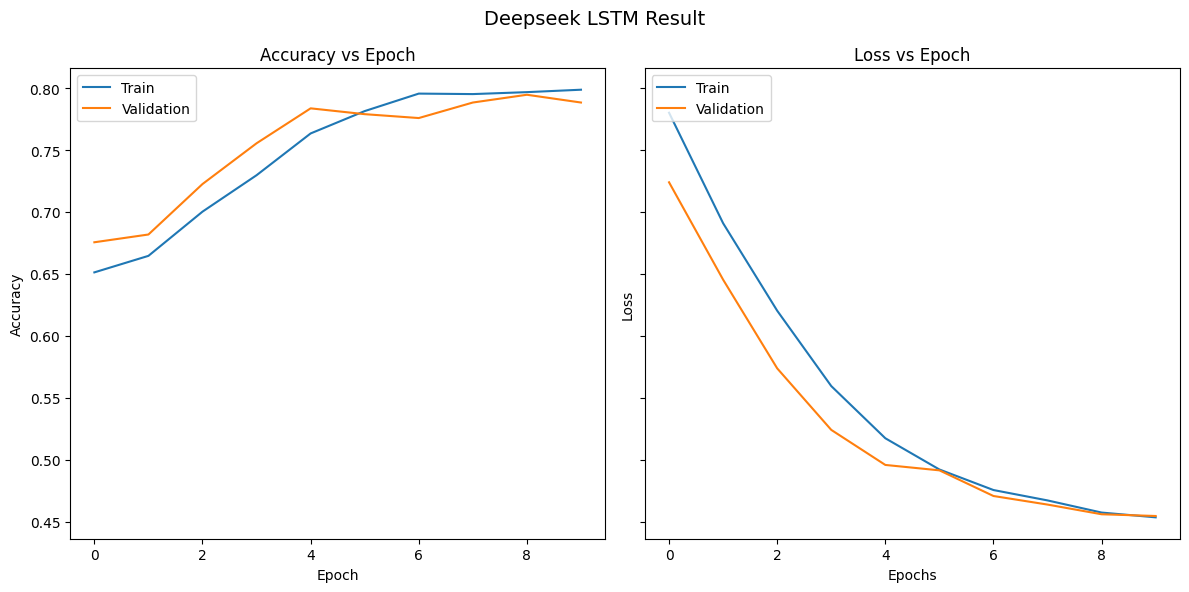

In [32]:
import matplotlib.pyplot as plt


# plot training and validation accuracy of the model
fig, axs = plt.subplots(1,2,figsize = (12,6), sharey = True)

# accuracy
axs[0].plot(history.history['accuracy'])
axs[0].plot(history.history['val_accuracy'])
axs[0].set_title('Accuracy vs Epoch')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend(['Train', 'Validation'], loc = 'upper left')


# plot training and validaton of loss value
axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set_title('Loss vs Epoch')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend(['Train', 'Validation'], loc = 'upper left')

plt.suptitle('Deepseek LSTM Result', fontsize = 14)
fig.tight_layout()
#plt.savefig('deepseek_lstm_result.png', dpi = 300, )
#files.download('deepseek_lstm_result.png')
plt.show()

In [33]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.2f}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7976 - loss: 0.4700
Test Loss: 0.46


In [34]:
def predict_sentiment(text):
  seq = tokenizer.texts_to_sequences([text])
  padded_seq = pad_sequences(seq, maxlen = max_length)
  prediction = model.predict(padded_seq)[0][0]
  return 'Positive' if prediction > 0.5 else 'Negative'

In [35]:
while True:
  user_input = input("Enter a review (type 'exit' to quit): ")
  if user_input.lower() == 'exit':
    break
  print(f"predicted sentiment: {predict_sentiment(user_input)}")

Enter a review (type 'exit' to quit): exit


In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 50, 128)        │        12,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 186,821 (729.77 KB)

 Trainable params: 62,273 (243.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 124,548 (486.52 KB)

## Bi LSTM

In [37]:
# create bi LSTM
from tensorflow.keras.layers import Bidirectional, Embedding, LSTM, Dense

model_bi = Sequential()
model_bi.add(Embedding(vocab_size, 128))
model_bi.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2, kernel_regularizer=l2(0.001))))
model_bi.add(Dense(1, activation='sigmoid'))

model_bi.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_bi.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [38]:
history_bi = model_bi.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 612ms/step - accuracy: 0.6217 - loss: 0.9582 - val_accuracy: 0.6661 - val_loss: 0.8431
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 367ms/step - accuracy: 0.6551 - loss: 0.8122 - val_accuracy: 0.6850 - val_loss: 0.7186
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 450ms/step - accuracy: 0.7017 - loss: 0.6979 - val_accuracy: 0.7461 - val_loss: 0.6159
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 499ms/step - accuracy: 0.7579 - loss: 0.5946 - val_accuracy: 0.7759 - val_loss: 0.5546
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 291ms/step - accuracy: 0.7780 - loss: 0.5409 - val_accuracy: 0.7806 - val_loss: 0.5072
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 444ms/step - accuracy: 0.7756 - loss: 0.5088 - val_accuracy: 0.7853 - val_loss: 0.4800
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 353ms/step - accuracy: 0.7911 - loss: 0.4746 - val_accuracy: 0.7962 - val_loss: 0.4731
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 431ms/step - accuracy: 0.7912 - loss: 0.4786 - val_accuracy:

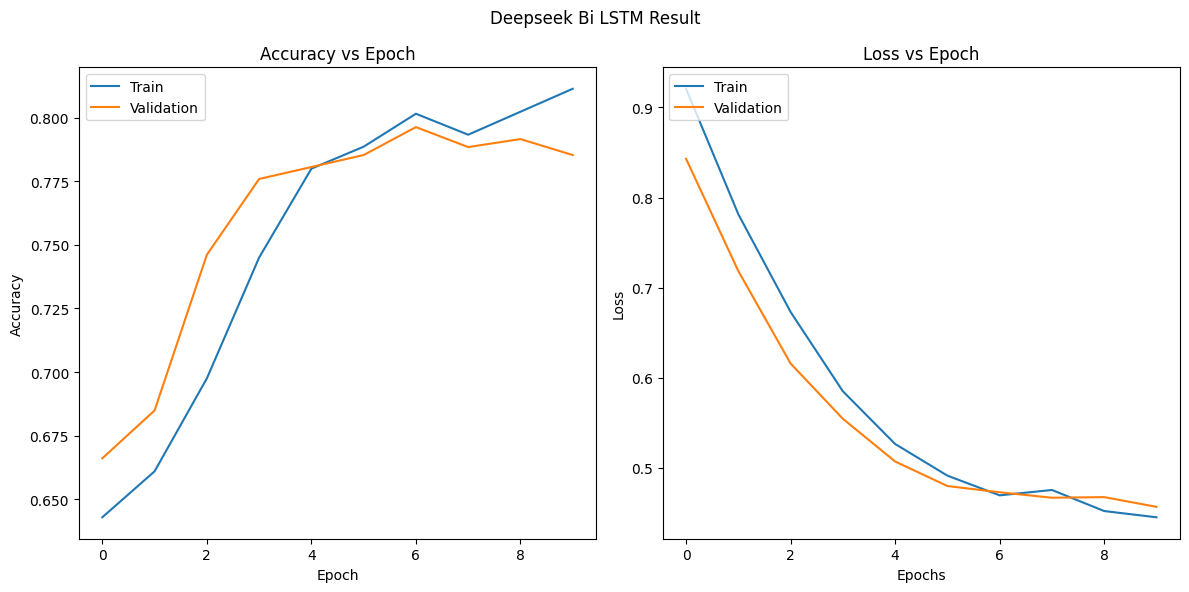

In [39]:
# accuracy
fig, axs = plt.subplots(1,2, figsize = (12,6))
axs[0].plot(history_bi.history['accuracy'])
axs[0].plot(history_bi.history['val_accuracy'])
axs[0].set_title('Accuracy vs Epoch')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend(['Train', 'Validation'], loc = 'upper left')

# loss
axs[1].plot(history_bi.history['loss'])
axs[1].plot(history_bi.history['val_loss'])
axs[1].set_title('Loss vs Epoch')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend(['Train', 'Validation'], loc = 'upper left')

plt.suptitle("Deepseek Bi LSTM Result")
plt.tight_layout()
#plt.savefig('deepseek_bi_lstm_result.png', dpi = 300)
#files.download('deepseek_bi_lstm_result.png')
plt.show()

In [40]:
model_bi.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 50, 128)        │        12,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 335,237 (1.28 MB)

 Trainable params: 111,745 (436.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 223,492 (873.02 KB)

## Save the Model

In [41]:
import os

save_dir = "/content/drive/MyDrive/Machine learning folder/ai sentiment analysis"
os.makedirs(save_dir, exist_ok = True)

bi_lstm_modelpath = os.path.join(save_dir, 'bi_lstm_deepseek.keras')
lstm_modelpath = os.path.join(save_dir, 'lstm_deepseek.keras')

model_bi.save(bi_lstm_modelpath)
print(f"Bi LSTM model saved to: {bi_lstm_modelpath}")

model.save(lstm_modelpath)
print(f"LSTM model saved to: {lstm_modelpath}")

Bi LSTM model saved to: /content/drive/MyDrive/Machine learning folder/ai sentiment analysis/bi_lstm_deepseek.keras
LSTM model saved to: /content/drive/MyDrive/Machine learning folder/ai sentiment analysis/lstm_deepseek.keras


In [44]:
# accuracy comparison

acc_model = pd.DataFrame({'Dataset': ['deepseek', 'claude', 'chatgpt'], 'Lexicon':[0.44, 0.51, 0.61], 'LSTM':[0.80, 0.76, 0.91]})
acc_model

,Dataset,Lexicon,LSTM
0,deepseek,0.44,0.80
1,claude,0.51,0.76
2,chatgpt,0.61,0.91


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

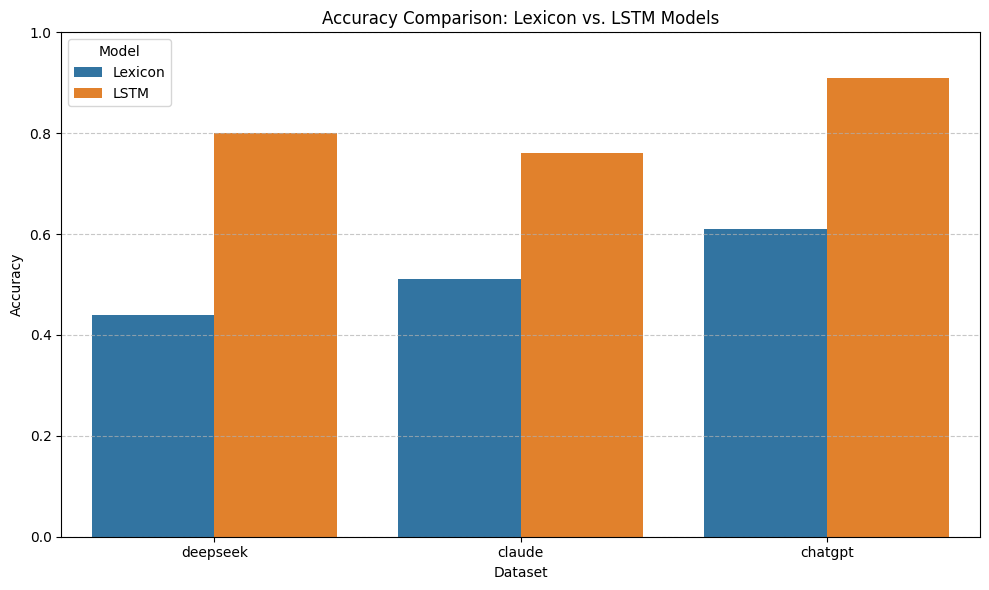

In [51]:
acc_model_melted = acc_model.melt(id_vars='Dataset', var_name='Model', value_name='Accuracy')

plt.figure(figsize=(10, 6))
sns.barplot(data=acc_model_melted, x='Dataset', y='Accuracy', hue='Model')
plt.title('Accuracy Comparison: Lexicon vs. LSTM Models')
plt.ylabel('Accuracy')
plt.xlabel('Dataset')
plt.ylim(0, 1) # Set y-axis limit from 0 to 1 for accuracy
plt.legend(title='Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
#plt.savefig('accuracy_comparison.png', dpi = 300, bbox_inches = 'tight')
#files.download('accuracy_comparison.png')
plt.show()